# Project 2
<hr>

## Sentiment Analysis on IMDB dataset
###### by Luis Martinez
<hr>



In [34]:
# Import libraries
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

import matplotlib.pyplot as plt

In [35]:
# Defining key values 
n_unique_words = 10000  # number of words to consider as features
maxlength      = 500    # maximum word length
batch_size     = 128

In [36]:
print('Loading data...')
(Xtrain, ytrain), (Xtest, ytest) = imdb.load_data(num_words=n_unique_words)
print(len(Xtrain), 'train sequences')
print(len(Xtest), 'test sequences')

print('Pad sequences (samples x time)')
Xtrain = sequence.pad_sequences(Xtrain, maxlen=maxlength)
Xtest  = sequence.pad_sequences(Xtest, maxlen=maxlength)
print('input_train shape:', Xtrain.shape)
print('input_test shape:', Xtest.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [37]:
# Create model
model = Sequential()
model.add(Embedding(n_unique_words, 32))
model.add(LSTM(32))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
# Compile the model
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(Xtrain, ytrain, 
                    batch_size=batch_size, 
                    epochs=12, 
                    validation_data=[Xtest, ytest], 
                    validation_split=0.2)

Epoch 1/12
157/157 [==============================] - 41s 249ms/step - loss: 0.5528 - accuracy: 0.7207 - val_loss: 0.3585 - val_accuracy: 0.8482
Epoch 2/12
157/157 [==============================] - 39s 249ms/step - loss: 0.2603 - accuracy: 0.8972 - val_loss: 0.2864 - val_accuracy: 0.8826
Epoch 3/12
157/157 [==============================] - 37s 235ms/step - loss: 0.1829 - accuracy: 0.9337 - val_loss: 0.3091 - val_accuracy: 0.8844
Epoch 4/12
157/157 [==============================] - 37s 236ms/step - loss: 0.1315 - accuracy: 0.9536 - val_loss: 0.3640 - val_accuracy: 0.8810
Epoch 5/12
157/157 [==============================] - 37s 235ms/step - loss: 0.1007 - accuracy: 0.9661 - val_loss: 0.3600 - val_accuracy: 0.8750
Epoch 6/12
157/157 [==============================] - 37s 236ms/step - loss: 0.0719 - accuracy: 0.9765 - val_loss: 0.4534 - val_accuracy: 0.8686
Epoch 7/12
157/157 [==============================] - 37s 236ms/step - loss: 0.0670 - accuracy: 0.9779 - val_loss: 0.5202 - val_ac

In [39]:
# Evaluate the model
_, train_acc = model.evaluate(Xtrain, ytrain, verbose = 0)
_, test_acc = model.evaluate (Xtest, ytest, verbose=0)
print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_acc, test_acc))

Training Accuracy: 0.970, Testing Accuracy: 0.856


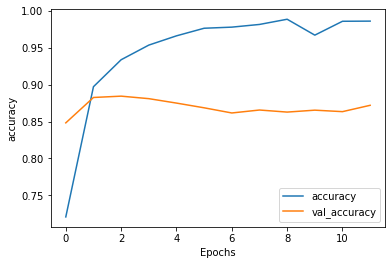

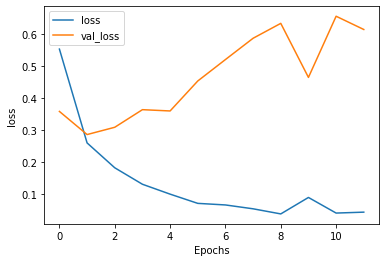

In [40]:
# Plotting results

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")